<br>
<br>
<font size=6>Kepler Exoplanet</font>
<br>
<br>
<br>
«<b>Ке́плер</b>» — космическая обсерватория НАСА, орбитальный телескоп со сверхчувствительным фотометром, специально предназначенный для поиска экзопланет (планет вне Солнечной системы — у других звёзд), подобных Земле. Это первый космический аппарат, созданный с такой целью. Он назван в честь немецкого математика и астронома Иоганна Кеплера, открывшего законы движения планет. Обсерватория могла одновременно наблюдать более чем 100 тыс. звёзд. Наличие планеты у звезды определяется по периодическим изменениям яркости последней, вызываемым прохождениями планеты перед звездой.<br>
<br>
Научная цель телескопа «Кеплер» состоит в том, чтобы исследовать структуру и разнообразие планетарных систем. Для этого, рассматривая множество звёзд, необходимо достичь нескольких целей:

 - Определить, сколько планет, подобных Земле, и больших планет находятся возле пригодной для жизни зоны (для всех спектральных типов звёзд).
 - Вычислить диапазон размеров и форм орбит этих планет.
 - Оценить количество планет, находящихся в мультизвёздных системах.
 - Определить диапазон размеров орбиты, яркости, диаметра, массы и плотности короткопериодических планет-гигантов.
 - Обнаружить дополнительные объекты в каждой найденной планетарной системе, используя другие методики.
 - Изучить свойства тех звёзд, у которых обнаружены планетарные системы.
 - Предполагалось, что в ближайшие 2 года «Кеплер» обнаружит примерно 50 планет похожих на Землю по своему химическому составу.
 <br><br>
 
<br>
<img src='data/kepler-1649c.jpg' width="600">
<br><br>
На Kaggle есть <a href='https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results'>набор данных</a>, опубликованный НАСА.<br>
Этот набор данных представляет собой кумулятивную запись всех наблюдаемых Кеплером кандидатов в экзопланеты.<br>
И также предлагает найти ответы на вопросы:
<br>

- Как часто экзопланеты, подтвержденные в существующей литературе, опровергаются измерениями с Кеплера? А как насчет наоборот?
- Какие общие характеристики экзопланет (которые мы можем найти) можно вывести из этого набора данных?
- Какие экзопланеты получили имена в литературе? Каково распределение оценок достоверности?

<br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('solved problems/data/cumulative.csv', index_col=0)
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [9]:
# Убираем характеристики планет, чтобы удобней работать с кандидатами кеплера и подтверждениями литературу(1 и 3 вопросы)
data_slice = data.loc[:, 'kepid':'koi_score'] 
data_slice.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score
rowid,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000


<br>
<font size=6>Эпизод Ⅰ</font><br>
<br>
<font size=5>Exploratory data analysis</font>
<hr>
Возьмем датасет <a href='https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot'>Melbourne Housing Snapshot</a> и будем предсказывать цены на жилье.<br>
<br>

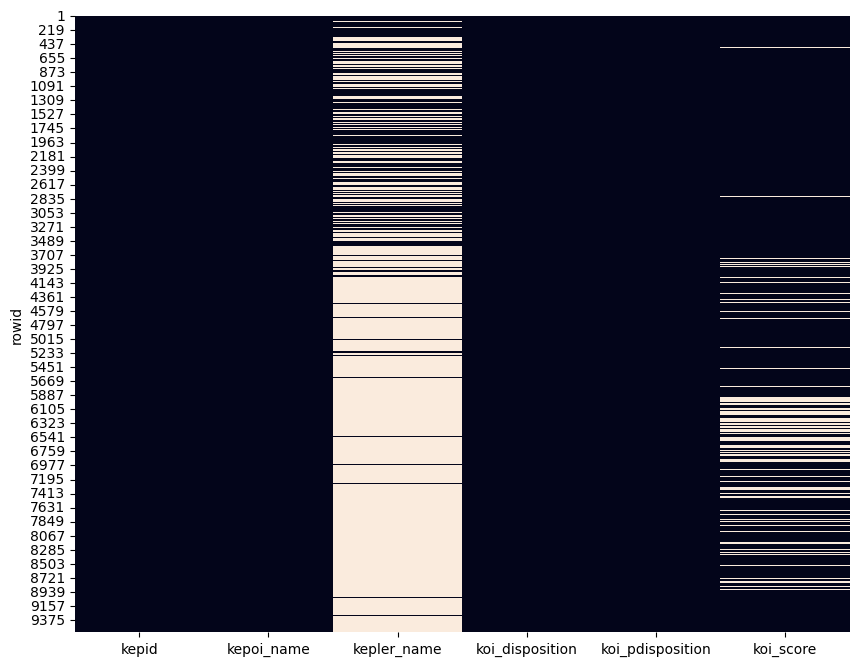


Количество пропусков в каждом столбце: 
kepid                  0
kepoi_name             0
kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_score           1510
dtype: int64


In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_slice.isnull(), cbar=False)
plt.show()

print('\nКоличество пропусков в каждом столбце: ')
print(data_slice.isnull().sum())

In [18]:
data_slice.kepler_name.fillna('Unconfired', inplace=True)
data_slice.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score
rowid,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969
3,10811496,K00753.01,Unconfired,FALSE POSITIVE,FALSE POSITIVE,0.000
4,10848459,K00754.01,Unconfired,FALSE POSITIVE,FALSE POSITIVE,0.000
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000


In [19]:
data_slice.isnull().sum()

kepid                  0
kepoi_name             0
kepler_name            0
koi_disposition        0
koi_pdisposition       0
koi_score           1510
dtype: int64

In [22]:
data_slice.dropna(inplace=True)
data_slice.isnull().sum()

kepid               0
kepoi_name          0
kepler_name         0
koi_disposition     0
koi_pdisposition    0
koi_score           0
dtype: int64

In [30]:
data_slice.koi_score.describe()

count    8054.000000
mean        0.480829
std         0.476928
min         0.000000
25%         0.000000
50%         0.334000
75%         0.998000
max         1.000000
Name: koi_score, dtype: float64

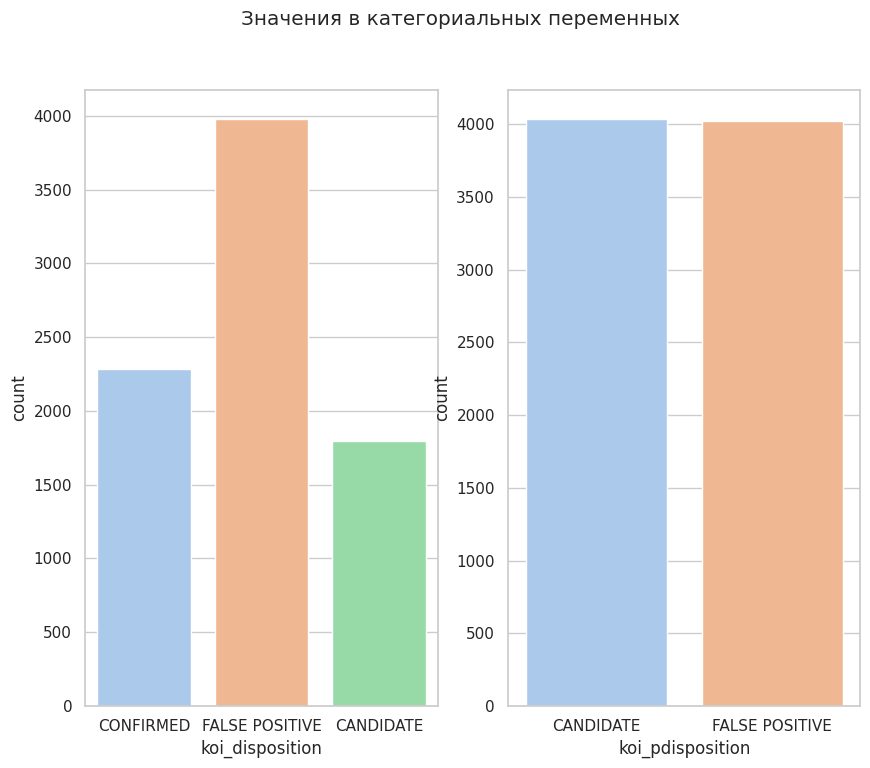

In [41]:
graph_categorical_columns = ['koi_disposition', 'koi_pdisposition']

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax = ax.flatten()
fig.suptitle('Значения в категориальных переменных')

sns.set_theme(style='whitegrid', palette='pastel')
for i in range(len(graph_categorical_columns)):
    sns.countplot(ax=ax[i], x=graph_categorical_columns[i], data=data_slice)

In [43]:
data_slice.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score
rowid,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969
3,10811496,K00753.01,Unconfired,FALSE POSITIVE,FALSE POSITIVE,0.000
4,10848459,K00754.01,Unconfired,FALSE POSITIVE,FALSE POSITIVE,0.000
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000


In [51]:
equals = data_slice[data_slice.koi_disposition == data_slice.koi_pdisposition].shape[0]
not_equals = data_slice[data_slice.koi_disposition != data_slice.koi_pdisposition].shape[0]

planets_confired_procent = equals / data_slice.shape[0]
planets_confired_procent

0.716786689843556

In [60]:
data_slice.groupby('koi_disposition').kepler_name.value_counts()

koi_disposition  kepler_name 
CANDIDATE        Unconfired      1797
CONFIRMED        Kepler-1 b         1
                 Kepler-10 b        1
                 Kepler-10 c        1
                 Kepler-100 b       1
                                 ... 
                 Kepler-997 b       1
                 Kepler-998 b       1
                 Kepler-999 b       1
FALSE POSITIVE   Unconfired      3975
                 Kepler-469 b       1
Name: kepler_name, Length: 2284, dtype: int64

/tmp/ipykernel_4357/3251172656.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_slice.koi_score, shade=True, palette='colorblind')
/tmp/ipykernel_4357/3251172656.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data_slice.koi_score, shade=True, palette='colorblind')


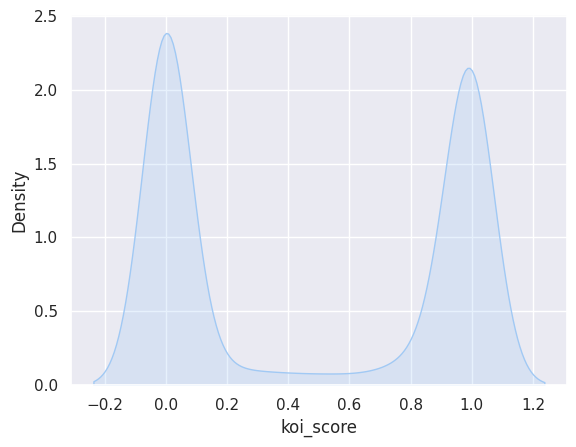

In [62]:
sns.set_style("darkgrid")
sns.kdeplot(data=data_slice.koi_score, shade=True, palette='colorblind')
plt.show()  